In [459]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lazypredict.supervised import LazyClassifier
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [460]:
# Load data set
data_train = pd.read_csv('Train_Data.csv')
data_test = pd.read_csv('Test_Data.csv')

data_train.head()

,Compound,A,B,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,In literature
0,TeRhO3,Te,Rh,cubic,2,4,0.97,0.77,0.60,2.10,2.28,2.39,2.00,-1.43,0.84,5.06430624,0.43,False
1,HgHfO3,Hg,Hf,rhombohedral,2,4,1.14,1.11,0.71,2.00,1.30,2.65,2.03,-2.11,0.85,4.753545157,0.51,False
2,TiCeO3,Ti,Ce,rhombohedral,2,4,0.86,0.71,0.87,1.54,1.12,2.28,2.27,-2.37,0.70,-173.4003942,0.62,False
3,CuTmO3,Cu,Tm,rhombohedral,not balanced,not balanced,0.68,0.68,0.96,1.90,1.25,2.30,2.12,-2.24,0.62,-,0.69,False
4,InLuO3,In,Lu,cubic,not balanced,not balanced,0.92,0.80,0.86,1.78,1.27,2.39,2.21,-2.28,0.73,-,0.61,False


In [461]:
data_train['v(A) number'] = pd.to_numeric(data_train['v(A)'], errors='coerce')
data_train['v(A) string'] = data_train['v(A)'].where(data_train['v(A) number'].isna())
data_train['v(A) number'] = data_train['v(A) number'].fillna(0)
data_train['v(B) number'] = pd.to_numeric(data_train['v(B)'], errors='coerce')
data_train['v(B) string'] = data_train['v(B)'].where(data_train['v(B) number'].isna())
data_train['v(B) number'] = data_train['v(B) number'].fillna(0)
data_train = data_train.drop(columns=['Compound', 'v(A)', 'v(B)'])
data_train = pd.get_dummies(data_train, columns=['A', 'B', 'Lowest distortion', 'In literature', 'v(A) string', 'v(B) string'], drop_first=True)
data_train = data_train.drop(columns=['τ'])
data_train.head(5)

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,...,B_Yb,B_Zn,B_Zr,Lowest distortion_cubic,Lowest distortion_orthorhombic,Lowest distortion_rhombohedral,Lowest distortion_tetragonal,In literature_True,v(A) string_not balanced,v(B) string_not balanced
0,0.97,0.77,0.60,2.10,2.28,2.39,2.00,-1.43,0.84,0.43,...,False,False,False,True,False,False,False,False,False,False
1,1.14,1.11,0.71,2.00,1.30,2.65,2.03,-2.11,0.85,0.51,...,False,False,False,False,False,True,False,False,False,False
2,0.86,0.71,0.87,1.54,1.12,2.28,2.27,-2.37,0.70,0.62,...,False,False,False,False,False,True,False,False,False,False
3,0.68,0.68,0.96,1.90,1.25,2.30,2.12,-2.24,0.62,0.69,...,False,False,False,False,False,True,False,False,True,True
4,0.92,0.80,0.86,1.78,1.27,2.39,2.21,-2.28,0.73,0.61,...,False,False,False,True,False,False,False,False,True,True


In [462]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Columns: 163 entries, r(AXII)(Å) to v(B) string_not balanced
dtypes: bool(151), float64(12)
memory usage: 869.0 KB


In [463]:
data_test.head()

,Compound,A,B,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,BeTeO3,Be,Te,cubic,2,4,0.45,0.45,0.97,1.57,2.10,2.18,2.12,-2.05,0.55,-3.764743316,0.69
1,TmGaO3,Tm,Ga,orthorhombic,3,3,1.05,0.96,0.62,1.25,1.81,2.41,1.97,-1.86,0.86,2.901942187,0.44
2,CeMgO3,Ce,Mg,orthorhombic,4,2,1.14,0.94,0.72,1.12,1.31,2.58,2.05,-2.35,0.85,-0.273427665,0.51
3,LiFeO3,Li,Fe,orthorhombic,1,5,0.92,0.76,0.59,0.98,1.83,2.45,2.00,-1.77,0.82,4.882882609,0.42
4,ThReO3,Th,Re,cubic,4,2,1.21,0.94,0.63,1.30,1.90,2.58,1.99,-1.92,0.91,-2.006581603,0.45


In [464]:
X = data_train.drop(columns = ['In literature_True'])
y = data_train['In literature_True']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LazyClassifier(verbose=0,ignore_warnings=False, predictions=True)
models, predictions = model.fit(X_train_scaled, X_test_scaled, y_train, y_test)
print(f'This is X_train {X_train.shape}')
print(f'This is X_test {X_test.shape}')
print(f'This is y_train {y_train.shape}')
print(f'This is y_test {y_test.shape}')
print("Model performance: ")
print(models)
print("Predictions: ")
print(predictions)

results_df = models.reset_index()
accuracy_sorted = results_df.sort_values(by='Accuracy', ascending = False)
balanced_accuracy_sorted = results_df.sort_values(by='Balanced Accuracy', ascending = False)
f1_sorted = results_df.sort_values(by='F1 Score', ascending=False)
roc_sorted = results_df.sort_values(by='ROC AUC', ascending = False)

 14%|█▍        | 4/29 [00:01<00:11,  2.13it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 72%|███████▏  | 21/29 [00:02<00:00, 12.55it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:03<00:00, 10.09it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 190, number of negative: 2691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 2881, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065949 -> initscore=-2.650644
[LightGBM] [Info] Start training from score -2.650644


100%|██████████| 29/29 [00:03<00:00,  7.91it/s]

This is X_train (2881, 162)
This is X_test (721, 162)
This is y_train (2881,)
This is y_test (721,)
Model performance: 
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.97               0.91     0.91      0.97   
RandomForestClassifier             0.98               0.90     0.90      0.98   
LGBMClassifier                     0.97               0.90     0.90      0.97   
XGBClassifier                      0.98               0.89     0.89      0.97   
ExtraTreesClassifier               0.97               0.89     0.89      0.97   
NearestCentroid                    0.86               0.88     0.88      0.89   
GaussianNB                         0.83               0.87     0.87      0.87   
SGDClassifier                      0.96               0.87     0.87      0.96   
BaggingClassifier                  0.97               0.86     0.86   

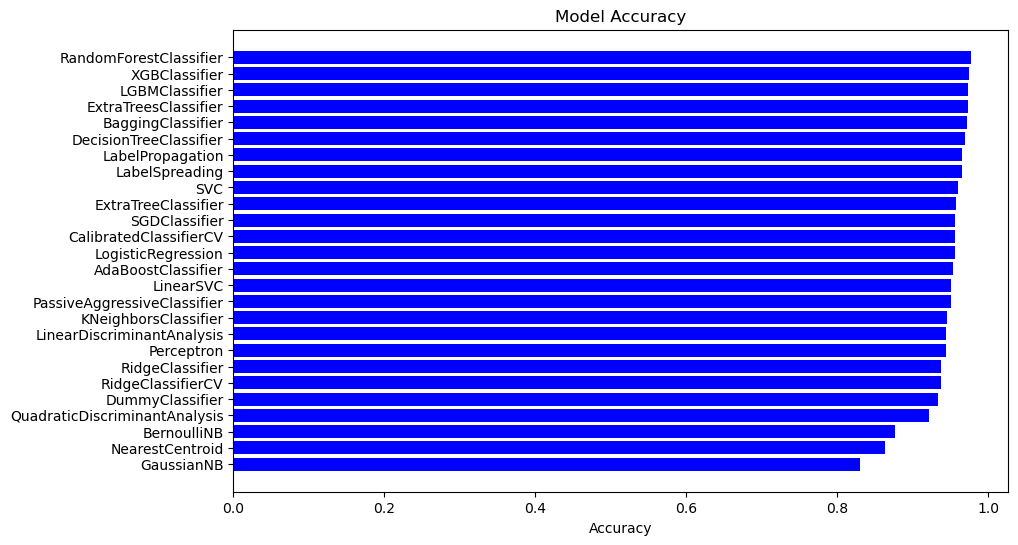

In [465]:
plt.figure(figsize=(10, 6))
plt.barh(accuracy_sorted['Model'], accuracy_sorted['Accuracy'], color='blue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.gca().invert_yaxis()
plt.show()

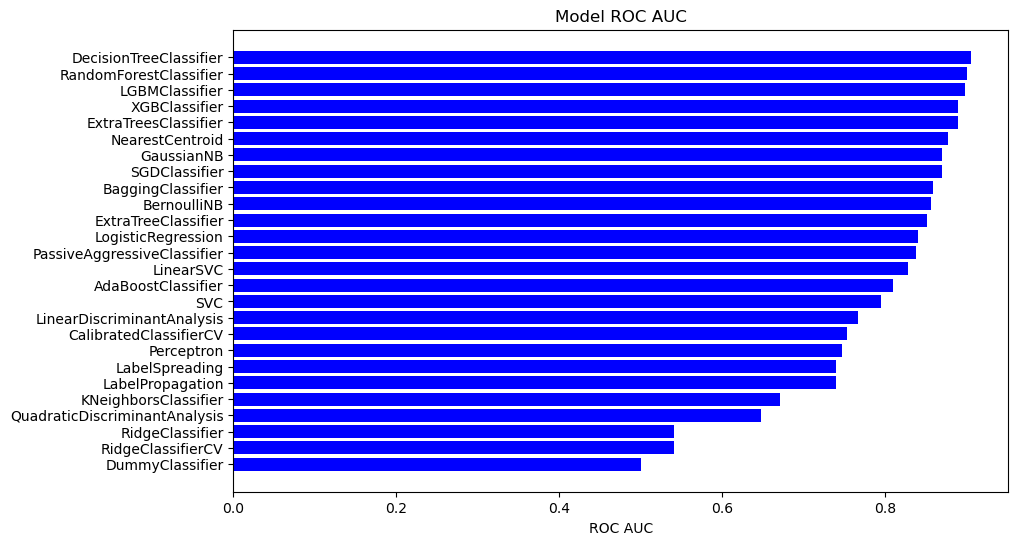

In [466]:
plt.figure(figsize=(10, 6))
plt.barh(roc_sorted['Model'], roc_sorted['ROC AUC'], color='blue')
plt.xlabel('ROC AUC')
plt.title('Model ROC AUC')
plt.gca().invert_yaxis()
plt.show()

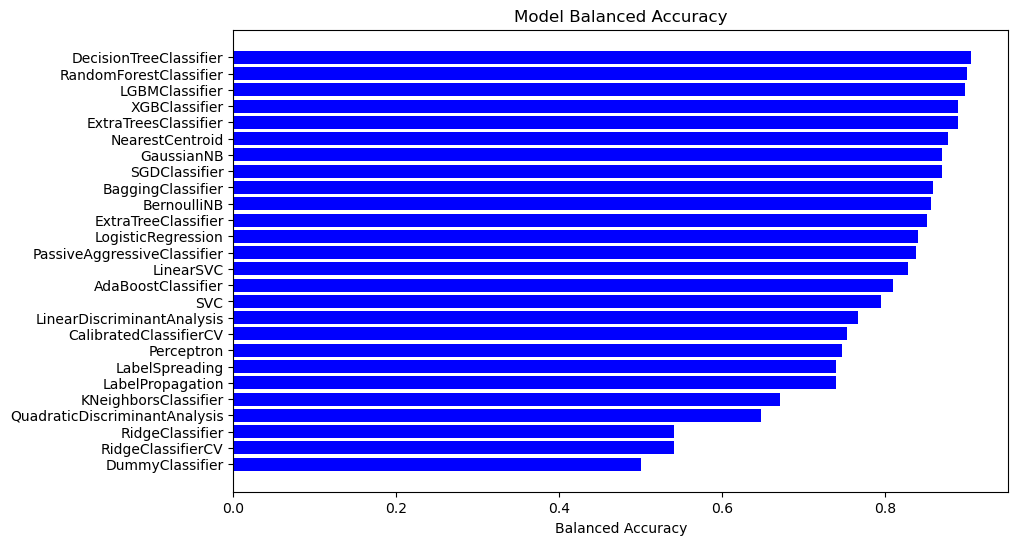

In [467]:
plt.figure(figsize=(10, 6))
plt.barh(roc_sorted['Model'], balanced_accuracy_sorted['Balanced Accuracy'], color='blue')
plt.xlabel('Balanced Accuracy')
plt.title('Model Balanced Accuracy')
plt.gca().invert_yaxis()
plt.show()

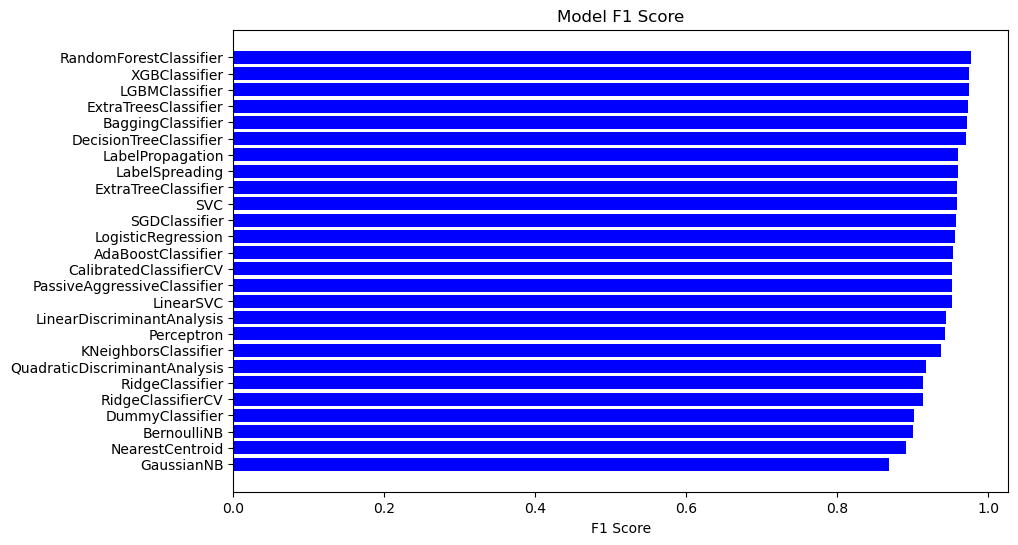

In [468]:
plt.figure(figsize=(10, 6))
plt.barh(f1_sorted['Model'], f1_sorted['F1 Score'], color='blue')
plt.xlabel('F1 Score')
plt.title('Model F1 Score')
plt.gca().invert_yaxis()
plt.show()